## Useful functions

In [13]:
# libraries to import
import numpy as np
import matplotlib.pyplot as plt
from LinearBanditTS import *
import matplotlib.pyplot as plt

In [14]:
def plot_regret(regrets):
    plt.plot(regrets)
    plt.xlabel('Time')
    plt.ylabel('Cumulative Regret')
    plt.title('Cumulative Regret as a Function of Time')
    plt.show()

# Week 4

## Goals and Objectives

### Make Thompson sampling algoirthm for linear bandits

In [15]:
def thompson_sampling_linear_bandits(d, item_features, true_theta, num_rounds, sigma_noise):

    # Initialize the linear bandit with Thompson Sampling
    bandit = LinearBanditTS(d, sigma_prior=1.0, sigma_noise=sigma_noise)

    # Initialize variables to keep track of the regrets and the number of times the best item is chosen
    regrets = np.zeros(num_rounds, dtype=float)
    differences = np.zeros(num_rounds, dtype=float)
    best_items = np.zeros(num_rounds, dtype=float)
    cumulative_regret = 0

    # Find the item with the highest dot product with the true theta
    best_item = np.argmax(item_features @ true_theta)

    # print("Best item index: ", best_item)
    # print("Best item features: ", item_features[best_item])
    # print("Dot products: ", item_features @ true_theta)
    print("-------")

    for t in range(num_rounds):

        # Sample a theta from the current multivariate Gaussian distribution
        sampled_theta = bandit.sample_theta()

        differences[t] = np.linalg.norm(true_theta - bandit.mu)

        # Choose the item with the highest dot product with the sampled theta
        chosen_item = np.argmax(item_features @ sampled_theta)

        # Compute the reward as true_theta @ item_features[chosen_item]
        reward = true_theta @ item_features[chosen_item]
        bandit.update(item_features[chosen_item], reward)

        # Update the regrets
        actual = true_theta @ item_features[chosen_item]
        cumulative_regret += true_theta @ item_features[best_item] - actual
        regrets[t] = cumulative_regret

        # Check if the best item was chosen
        best_items[t] = 1.0 if chosen_item == best_item else 0.0

    # print("Final theta: ", sampled_theta)
    print("Final estimate: ", bandit.mu)
    return regrets, best_items, differences

In [16]:
def run_and_plot_thompson_sampling(d, item_features, true_theta, num_rounds, sigma_noise, nbr_runs):
    regrets = np.zeros(num_rounds, dtype=float)
    differences = np.zeros(num_rounds, dtype=float)

    for run in range(nbr_runs):
        print(run)
        regret, _, difference = thompson_sampling_linear_bandits(d, item_features, true_theta, num_rounds, sigma_noise)
        regrets += regret
        differences += difference

    average_regrets = np.divide(regrets, nbr_runs)
    average_differences = np.divide(differences, nbr_runs)

    plt.plot(average_regrets)
    plt.xlabel("Number of Rounds")
    plt.ylabel("Average Regret")
    plt.title("Average Regret vs. Number of Rounds")
    plt.show()

    plt.loglog(average_differences)
    plt.xlabel("Number of Rounds")
    plt.ylabel("Average Difference")
    plt.title("Average Difference vs. Number of Rounds")
    plt.show()

True theta:  [-0.94252008  0.36007468  0.30626913  0.8593181  -0.92396082]
-------
Final estimate:  [-0.7167146   0.23484184  0.61959689  0.67776954 -0.84873819]


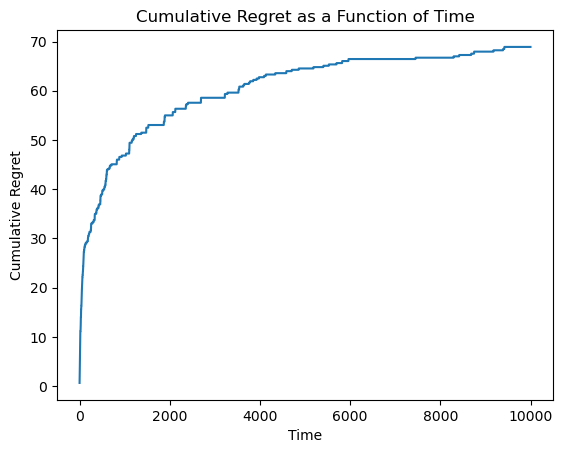

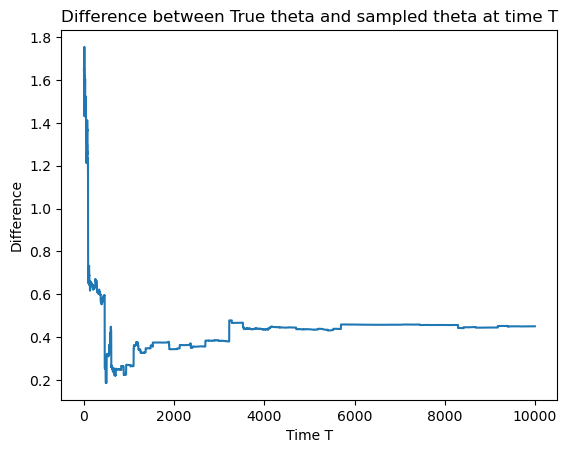

In [17]:
# Setup
d = 5
num_items = 10
num_rounds = 10000
sigma_noise = 1.0
# Generate random item_features with values between -1 and 1
item_features = np.random.uniform(low=-1, high=1, size=(num_items, d))
# Generate a random true_theta with values between -1 and 1
true_theta = np.random.uniform(low=-1, high=1, size=d)
print("True theta: ", true_theta)

regrets, best_items, differences = thompson_sampling_linear_bandits(d, item_features, true_theta, num_rounds, sigma_noise)

# Plot the regret
plot_regret(regrets)

# Plot the differences
plt.plot(differences)
plt.xlabel('Time T')
plt.ylabel('Difference')
plt.title('Difference between True theta and sampled theta at time T')
plt.show()


Over 1000 runs

0
-------
Final estimate:  [-0.45366921 -0.11891852  0.69583613  0.13476659 -0.74153909]
1
-------
Final estimate:  [-0.84334937  0.09767064  0.13748809  0.44877671 -0.84280851]
2
-------
Final estimate:  [-1.1383341   0.3271605   0.19781738  1.18307886 -0.89975923]
3
-------
Final estimate:  [-1.11434954  0.39219569  0.32518797  1.25791376 -0.84076104]
4
-------
Final estimate:  [-0.60520908 -0.19742437  0.2813721  -0.05792406 -0.54611122]
5
-------
Final estimate:  [-0.95527818  0.20742261  0.18132689  0.59076701 -0.55052141]
6
-------
Final estimate:  [-0.89533522  0.26418408  0.2678178   0.7093163  -0.86713057]
7
-------
Final estimate:  [-0.80877644  0.52009816  0.42814586  0.72710029 -0.9641108 ]
8
-------
Final estimate:  [-0.43685033 -0.46260999  0.36700298 -0.34386134 -0.4012119 ]
9
-------
Final estimate:  [-0.52863685  0.3127877   0.73182766  0.50439078 -1.31181369]
10
-------
Final estimate:  [-1.09593231  0.5362833   0.13781546  1.02394093 -1.00765915]
11
-------
Final est

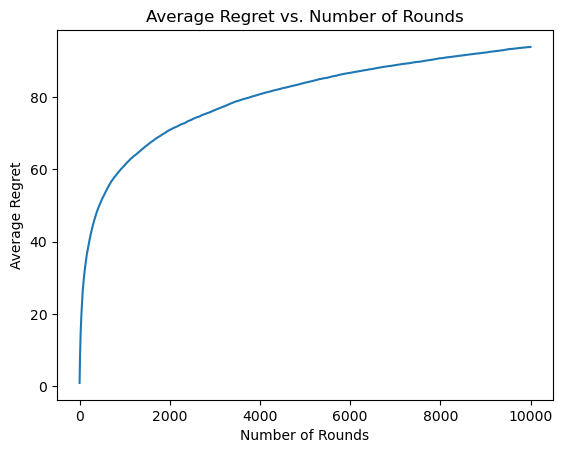

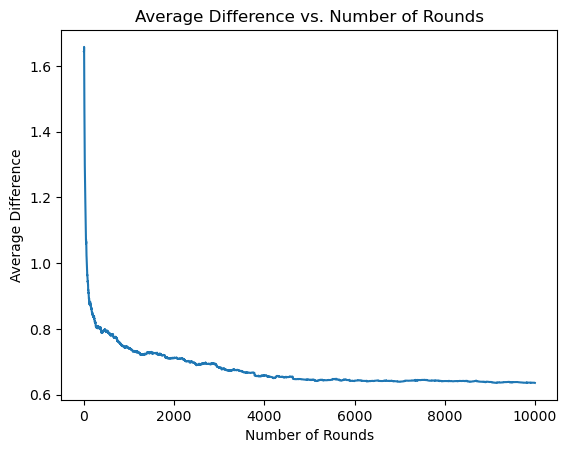

In [18]:
# Setup
# d = 3
# num_rounds = 1000
nbr_runs = 100
# sigma_noise = 1.0
# item_features = np.random.rand(num_items, d)
# true_theta = np.random.rand(d)

run_and_plot_thompson_sampling(d, item_features, true_theta, num_rounds, sigma_noise, nbr_runs)
